<a href="https://colab.research.google.com/github/ammarisme/covid-19/blob/master/CV19_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/My Drive/covid"
DATASET_TYPE = "validation"
TARGET_DIR = "cleaned"
SOURCE_DIR = "raw"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
original_data = pd.read_csv(PATH+'/input/'+DATASET_TYPE+'/'+SOURCE_DIR+'/raw_worldwide_cases_27_04.csv')
#cleaning the data for further processing
original_data = original_data[['cases','deaths','popData2018','countriesAndTerritories','geoId','countryterritoryCode','continentExp']] 

original_data.isna().any()

cases                      False
deaths                     False
popData2018                 True
countriesAndTerritories    False
geoId                       True
countryterritoryCode        True
continentExp               False
dtype: bool

In [0]:
def clean_dataset(original_data, meta_dictionary, min_count=-1):
  original_data = original_data.reindex(index=original_data.index[::-1])
  """
  remove any country with missing values in  death or case or countriesAndTerritories  data. Because these are critical.
  """

  data_1 = pd.DataFrame(columns = original_data.columns)
  data_1 = data_1.assign(_country_code =[])
  country_code = 1
  for country in original_data['countriesAndTerritories'].unique():
    if original_data[original_data['countriesAndTerritories']==country]['countriesAndTerritories'].isna().any() == False and \
    original_data[original_data['countriesAndTerritories']==country]['cases'].isna().any() == False and \
    (min_count == -1 or len(original_data[original_data['countriesAndTerritories']==country] ) >= min_count) and  \
    original_data[original_data['countriesAndTerritories']==country]['deaths'].isna().any() == False :    
      temp_data = pd.DataFrame(columns = data_1.columns)
      temp_data = temp_data.append(original_data[original_data['countriesAndTerritories']==country])
      temp_data['_country_code'] =int(country_code)
      country_code += 1
      data_1 = data_1.append(temp_data)

  """
  replace missing geoid, countryterritory code with the countriesAndTerritories
  """
  data_1['geoId'] = data_1['geoId'].fillna(data_1['countriesAndTerritories']+ '_1')
  data_1['countryterritoryCode'] = data_1['geoId'].fillna(data_1['countriesAndTerritories']+ '_1')

  """
  remove missing population countries
  """
  data_2 = pd.DataFrame(columns = data_1.columns)
  for country in data_1['countriesAndTerritories'].unique():
    if data_1[data_1['countriesAndTerritories']==country]['popData2018'].isna().any() == False and \
    data_1[data_1['countriesAndTerritories']==country]['popData2018'].isnull().any() == False :
      data_2 = data_2.append(data_1[data_1['countriesAndTerritories']==country])

  data_2['countryterritoryCode'] = [meta_dictionary['countryterritoryCode'][index] for index in data_2['countryterritoryCode'].tolist()] 
  data_2['continentExp'] = [meta_dictionary['continentExp'][index] for index in data_2['continentExp'].tolist()] 
  data_2['geoId'] = [meta_dictionary['geoId'][index] for index in data_2['geoId'].tolist()] 
  data_2['countriesAndTerritories'] = [meta_dictionary['countriesAndTerritories'][index] for index in data_2['countriesAndTerritories'].tolist()] 
  
  print(len(data_2))
  print(data_2.isna().any())
  print(data_2.head())
  return data_2

In [0]:
def verify_clean(cleaned_data):
  print(len(data_2))
  print(data_2.isna().any())
  print(data_2.head())
  

In [0]:
import pickle

#metadata generation
def generate_meta_data(cleaned_data):
  countryterritoryCode = dict(zip(cleaned_data['countryterritoryCode'].unique().tolist(), range(1, 1+len(cleaned_data['countryterritoryCode'].unique()))))
  continentExp = dict(zip(cleaned_data['continentExp'].unique().tolist(), range(1, 1+len(cleaned_data['continentExp'].unique()))))
  geoId = dict(zip(cleaned_data['geoId'].unique().tolist(), range(1, 1+len(cleaned_data['geoId'].unique()))))
  countriesAndTerritories = dict(zip(cleaned_data['countriesAndTerritories'].unique().tolist(), range(1, 1+len(cleaned_data['countriesAndTerritories'].unique()))))

  meta_dictionary = {
      'countryterritoryCode' : countryterritoryCode,
      'continentExp' : continentExp,
      'geoId' : geoId,
      'countriesAndTerritories' : countriesAndTerritories
      }

  with open(PATH+'/input/categorical_numerical_mapping.dict', 'wb') as handle:
      pickle.dump(meta_dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

  with open(PATH+'/input/categorical_numerical_mapping.dict', 'rb') as handle:
      b = pickle.load(handle)
  print(b)
  return meta_dictionary

def load_category_numerical_dict():
  with open(PATH+'/input/categorical_numerical_mapping.dict', 'rb') as handle:
      b = pickle.load(handle)
  return b


In [0]:
#cleaning the dataset
category_numerical_dict = load_category_numerical_dict()
cleaned_data = clean_dataset(original_data, category_numerical_dict, min_count=-1)

#meta_dictionary['countryterritoryCode']
#original_data['countryterritoryCode'].tolist()[0]
cleaned_data.to_csv(PATH+'/input/'+DATASET_TYPE+'/'+TARGET_DIR+'/cleaned_worldwide_cases_27_04.csv', index=False)
cleaned_data.head()

13095
cases                      False
deaths                     False
popData2018                False
countriesAndTerritories    False
geoId                      False
countryterritoryCode       False
continentExp               False
_country_code              False
dtype: bool
      cases deaths  ...  continentExp  _country_code
13210     1      0  ...             1            1.0
13209     1      0  ...             1            1.0
13208     0      0  ...             1            1.0
13207     0      1  ...             1            1.0
13206     0      0  ...             1            1.0

[5 rows x 8 columns]


,cases,deaths,popData2018,countriesAndTerritories,geoId,countryterritoryCode,continentExp,_country_code
13210,1,0,14439018.0,1,1,1,1,1.0
13209,1,0,14439018.0,1,1,1,1,1.0
13208,0,0,14439018.0,1,1,1,1,1.0
13207,0,1,14439018.0,1,1,1,1,1.0
13206,0,0,14439018.0,1,1,1,1,1.0


In [0]:
#I want to identify the best input length for the sequence for the input of NN. Considering the validation set.

records_per_country = [[country, len(original_data[original_data['countriesAndTerritories'] == country ])] for country in original_data['countriesAndTerritories'].unique()]
records_per_country = np.transpose(records_per_country)

counts = np.array(records_per_country[1], dtype=np.int32)
mu = np.mean(counts)
sigma = np.std(counts)
max_days = max(counts)
records_bin_counts = np.bincount(counts)

print('maximum days available :', max(counts))
print('minimum days available :', min(counts))
bins = np.array(range(max_days))

print(records_bin_counts)


maximum days available : 118
minimum days available : 1
[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0  1
  1  1  3  1  0  0  1  3  3  4  3  6  5  7 13  7  4  4  5 16 12  8  2  3
  8  3  4  2  4  1  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  1  1  1  7  2  4  2  4  6  4  5  5 23]


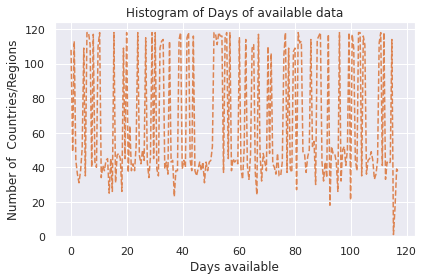

In [0]:

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(bins, len(counts)-1, density=1)

# add a 'best fit' line
ax.plot(bins, counts, '--')
ax.set_xlabel('Days available')
ax.set_ylabel('Number of  Countries/Regions')
ax.set_title(r'Histogram of Days of available data')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

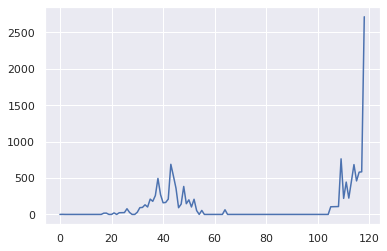

In [0]:
record_avail = []
for available_days in range(len(records_bin_counts)):
  number_of_countries_with_respect_to_available_days = records_bin_counts[available_days]
  number_of_records_available = available_days * number_of_countries_with_respect_to_available_days
  record_avail.append(number_of_records_available)
plt.plot(record_avail)


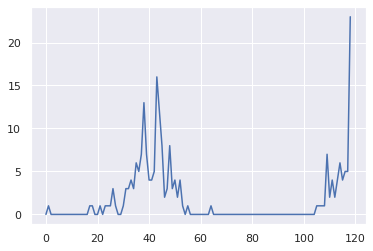

In [0]:
plt.plot(records_bin_counts)

In [0]:
n = [[country, len(original_data[original_data['countriesAndTerritories'] == country ])] for country in original_data['countriesAndTerritories'].unique()]
n = np.array(n).T
n = pd.DataFrame({
    'c' : n[0],
    'count' : np.array(n[1], dtype=np.int32)
})

print(n.head())


             c  count
0  Afghanistan    108
1      Albania     49
2      Algeria    113
3      Andorra     44
4       Angola     36


Optimal number of days to choose from the dataset:
     days  records
104   104     6864


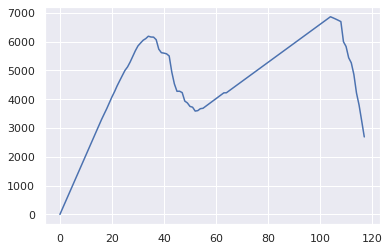

In [0]:
dataset_lengths = []
for days in range(max_days):
  number_of_countries = n[n['count'] > days]['count'].count()
  dataset_lengths.append([days, days*number_of_countries])

dataset_lengths = np.array(dataset_lengths).T
dataset_lengths = pd.DataFrame({
    'days' : dataset_lengths[0],
    'records' : np.array(dataset_lengths[1], dtype=np.int32)
})

plt.plot(dataset_lengths['records'])

print('Optimal number of days to choose from the dataset:' )
print(dataset_lengths[dataset_lengths['records']==max(dataset_lengths['records'])])